#  Random Forest Regression
-----

## Step 1: <span style="text-decoration:underline">Importing the libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### For hide all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: <span style="text-decoration:underline">Importing the dataset</span>

In [3]:
dataset = pd.read_csv("voice.csv")

In [4]:
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
dataset.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [6]:
dataset['label'].unique()

array(['male', 'female'], dtype=object)

## Step 3:  <span style="text-decoration:underline">Data analysis</span>

In [7]:
# To analyze descriptive statistics of data
dataset.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [9]:
dataset.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

<Axes: >

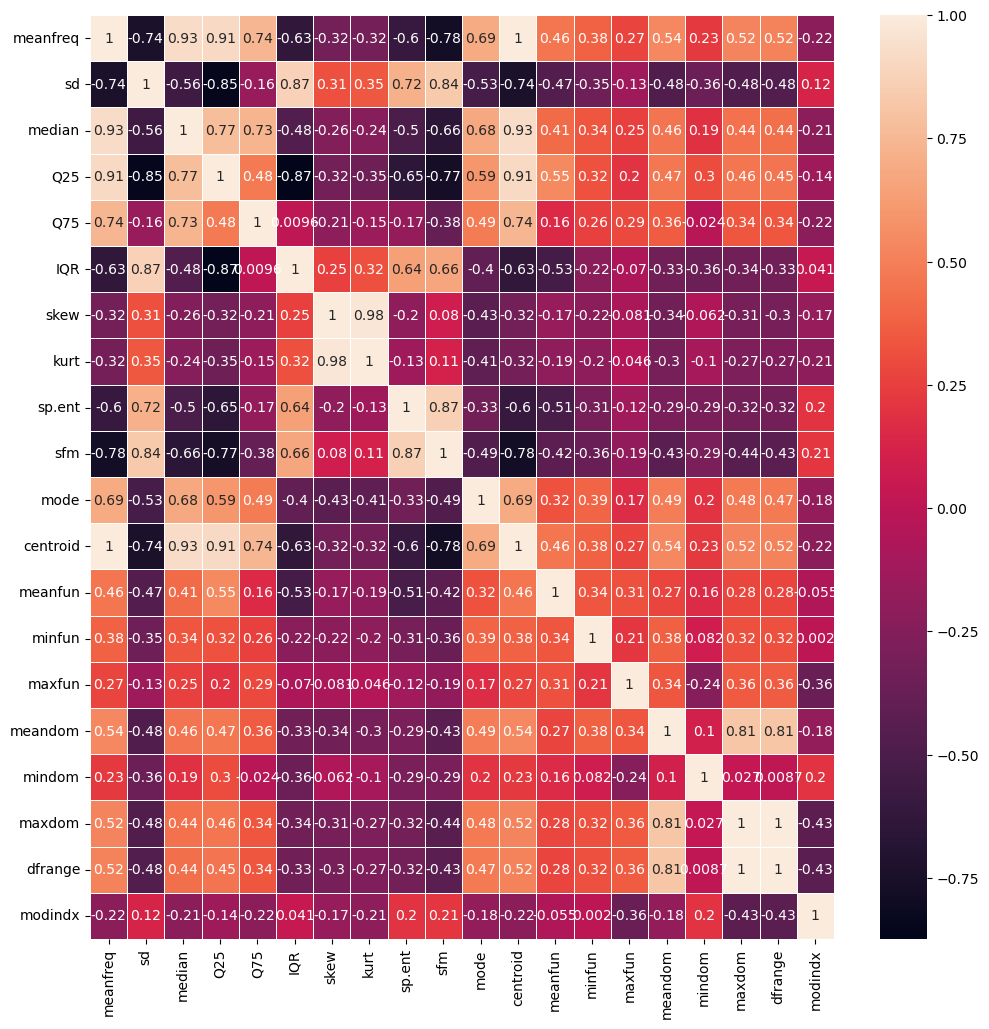

In [10]:
fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(dataset.corr(),annot=True, linewidth=.5, ax=ax)

> The result of the previous cell is the correlation matrix. 

   **The correlation matrix** is a table that shows the correlation coefficients between variables. Correlation coefficients range from -1 to 1:
   
- 1 means a perfect positive correlation.
- 0 means no correlation.
- -1 means a perfect negative correlation.

## Step 4: <span style="text-decoration:underline">Split the dataset into dependent/independent variables</span>

In [11]:
# independent variables
x = dataset.iloc[:,0:-1].values
# dependent variables
y = dataset.iloc[:,-1].values

y = y.reshape(len(y),1)

## Step 5: <span style="text-decoration:underline">Data Preprocessing</span>

### the most commonly used techniques:

1. Label Encoding:

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = onehot_encoder.fit_transform(y.reshape(-1, 1))


2. One-Hot Encoding:

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)


> I will choose the second way

In [14]:
encoded_y

array([1, 1, 1, ..., 0, 0, 0])

## Step 6:  <span style="text-decoration:underline">Spliting the dataset into thetraining set and test set</span>

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,encoded_y,test_size=0.2,
                                                   random_state=0)

## Step 7: <span style="text-decoration:underline">Training the Random Forest Regression model on training set</span>

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

## Step 8: <span style="text-decoration:underline">Predicting The Test set results</span>

In [17]:
y_pred = regressor.predict(x_test)

In [18]:
df = pd.DataFrame({'Real Values':y_test.flatten().tolist(), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,0,0.0
1,1,1.0
2,0,0.0
3,0,0.0
4,1,1.0
...,...,...
629,1,1.0
630,0,0.0
631,1,1.0
632,0,0.0


## Step 9:  <span style="text-decoration:underline">Visualsing the Training set results</span>

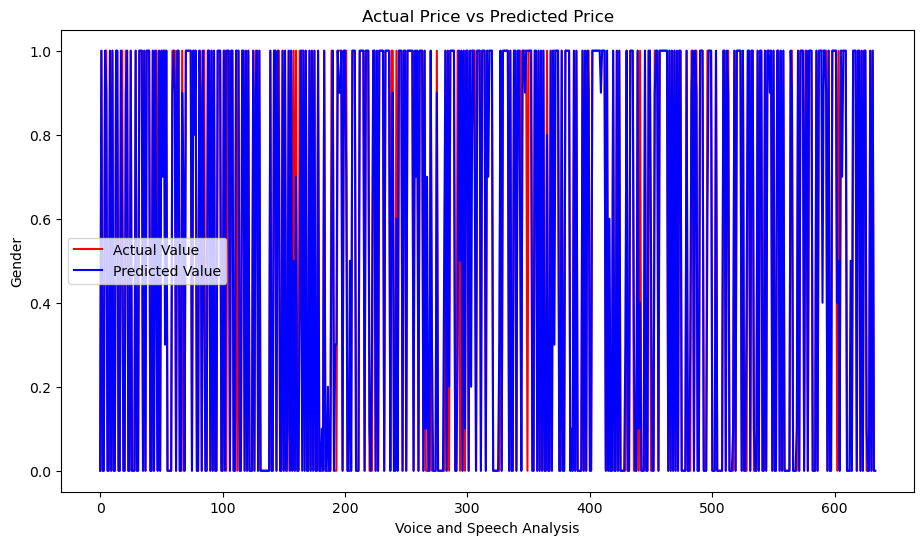

In [19]:
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.show()

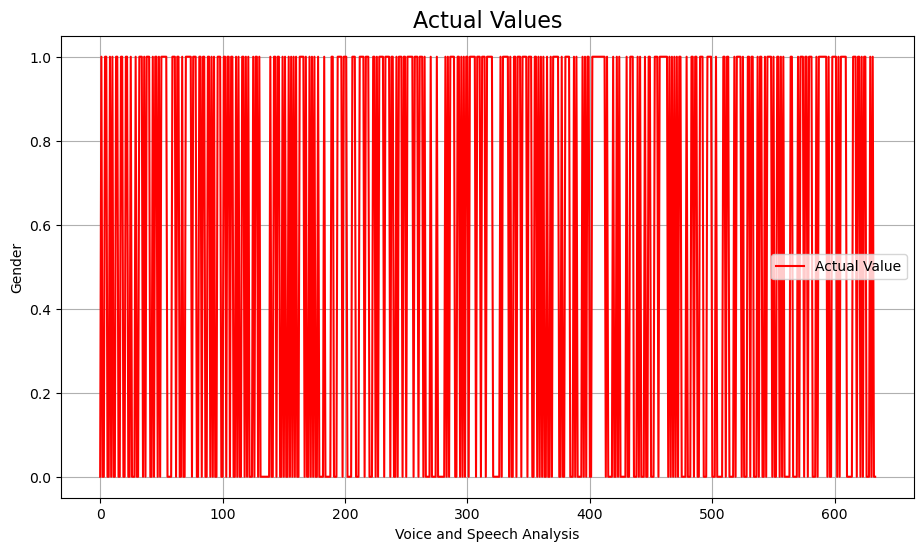

In [20]:
# Plot for Actual Values
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.title('Actual Values', fontsize=16)
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.grid(True)
plt.show()

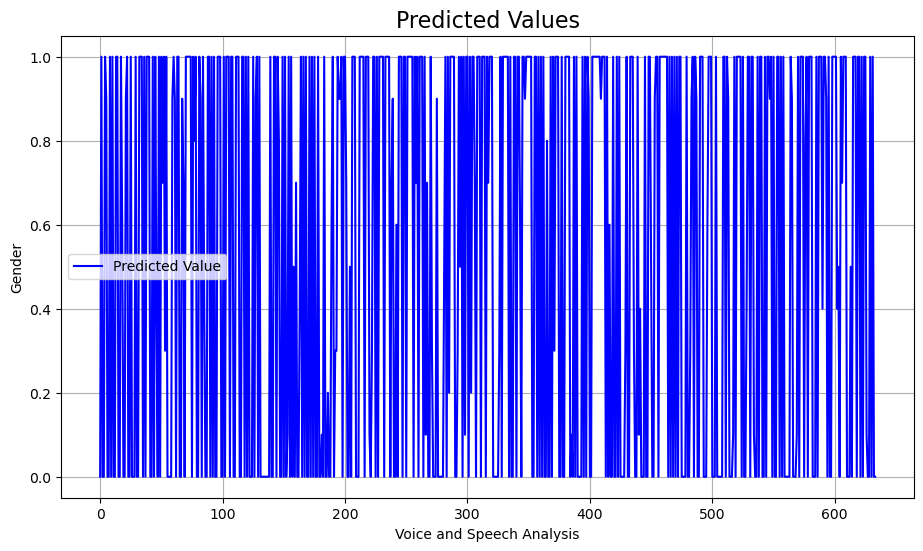

In [21]:
# Plot for Predicted Values
plt.figure(figsize=(11, 6))
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Predicted Values', fontsize=16)
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.grid(True)
plt.show()

## step 10: <span style="text-decoration:underline">model evaluation</span>

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
print('mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  0.023848580441640378
mean_absolute_error :  0.04479495268138801


## step 11: <span style="text-decoration:underline">Calculating R² with Scikit-Learn</span>

In [23]:
from sklearn.metrics import r2_score
R2_sklearn = r2_score(y_test, y_pred)
print(f"R² (Scikit-Learn Calculation): {R2_sklearn}")

R² (Scikit-Learn Calculation): 0.9043620364550597


## Sources:
----
- scikit-learn.org : https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- kaggle : https://www.kaggle.com/datasets/primaryobjects/voicegender
- Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2024] : https://www.udemy.com/course/machinelearning/?couponCode=2021PM20